In [1]:
import pandas as pa
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
data = pa.read_csv(r'hotel_bookings (1).csv')

In [3]:
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [6]:
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [7]:
data.shape

(119390, 32)

In [8]:
data['is_canceled'].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             float64
company                           float64
days_in_waiting_list                int64
customer_type                      object
adr                               float64
required_car_parking_spaces         int64
total_of_special_requests           int64
reservation_status                 object
reservation_status_date            object

In [9]:
data['target'] = np.where(data['is_canceled'].isin(['1']),1,0)

In [10]:
data.shape

(119390, 33)

In [11]:
data['target'].mean()

0.37041628277075134

#### This is my base value

## Visualisation of the data

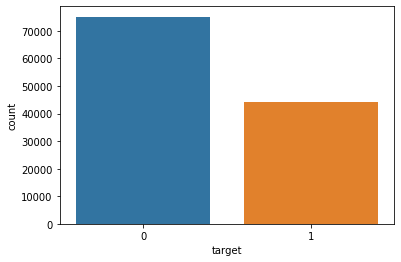

In [12]:
sb.countplot(x='target', data=data)
plt.show()

In [14]:
#Replacing the missing value
#agent : if the no agent was given, booking was most likely made without one
#company : if none given, it was most likely private
nan_replacements = {"children": 0, "country":"unknown", "agent":0, "company":0}
data = data.fillna(nan_replacements)


In [16]:
data['meal'].replace("undefined", "sc", inplace = True)

In [20]:
data['meal'].value_counts()

BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

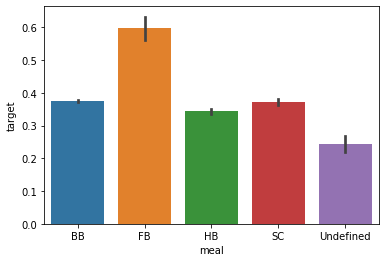

In [21]:
ax = sb.barplot(x = 'meal', y='target', data=data, estimator=np.mean)

In [23]:
data.groupby('country')['target'].mean()

country
ABW        0.000000
AGO        0.566298
AIA        0.000000
ALB        0.166667
AND        0.714286
             ...   
VNM        0.250000
ZAF        0.387500
ZMB        0.500000
ZWE        0.500000
unknown    0.137295
Name: target, Length: 178, dtype: float64

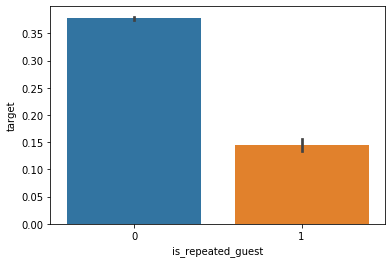

In [24]:
ax = sb.barplot(x='is_repeated_guest', y = 'target', data=data, estimator=np.mean)

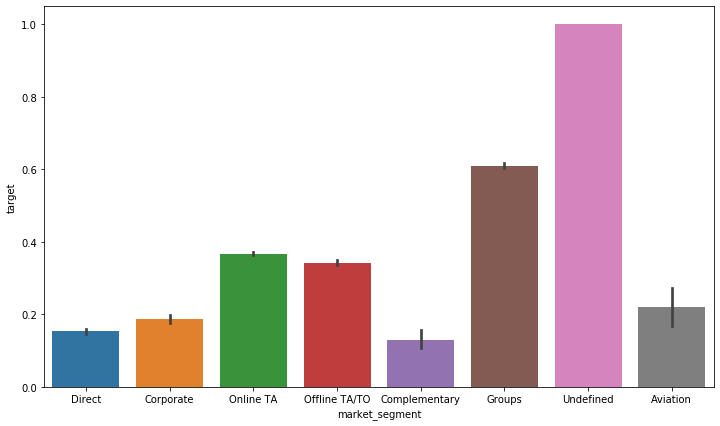

In [26]:
plt.figure(figsize=(12, 7))
ax = sb.barplot(x='market_segment', y = 'target', data=data, estimator=np.mean)

In [27]:
data.groupby('market_segment')['target'].count()

market_segment
Aviation           237
Complementary      743
Corporate         5295
Direct           12606
Groups           19811
Offline TA/TO    24219
Online TA        56477
Undefined            2
Name: target, dtype: int64

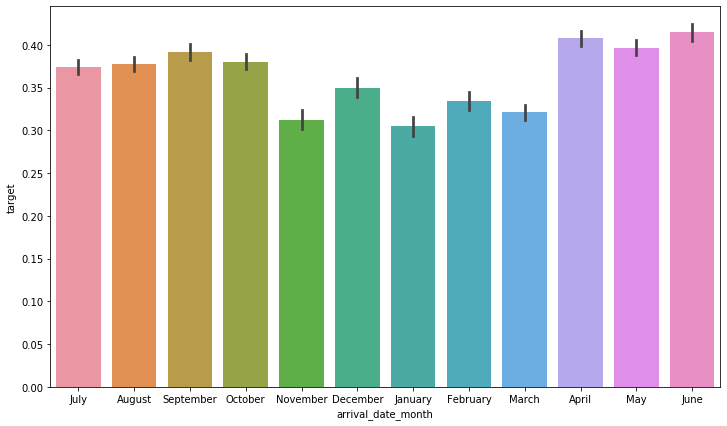

In [29]:
plt.figure(figsize=(12, 7))
ax = sb.barplot(x='arrival_date_month', y = 'target', data=data, estimator=np.mean)

In [30]:
data.groupby('arrival_date_month')['target'].count()

arrival_date_month
April        11089
August       13877
December      6780
February      8068
January       5929
July         12661
June         10939
March         9794
May          11791
November      6794
October      11160
September    10508
Name: target, dtype: int64

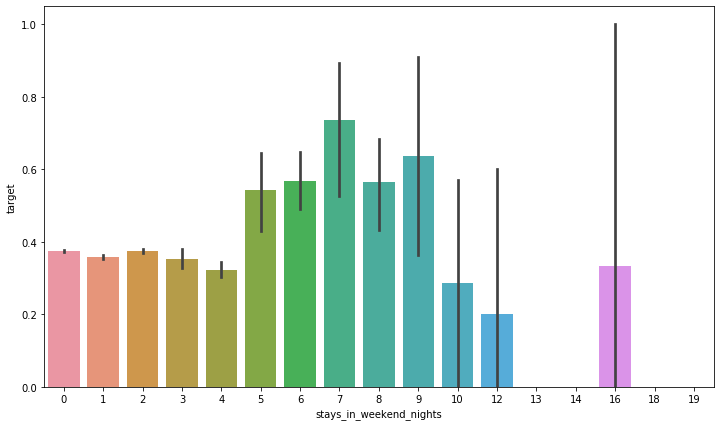

In [32]:
plt.figure(figsize=(12, 7))
ax = sb.barplot(x='stays_in_weekend_nights', y = 'target', data=data, estimator=np.mean)

In [33]:
data.groupby('stays_in_weekend_nights')['target'].count()

stays_in_weekend_nights
0     51998
1     30626
2     33308
3      1259
4      1855
5        79
6       153
7        19
8        60
9        11
10        7
12        5
13        3
14        2
16        3
18        1
19        1
Name: target, dtype: int64

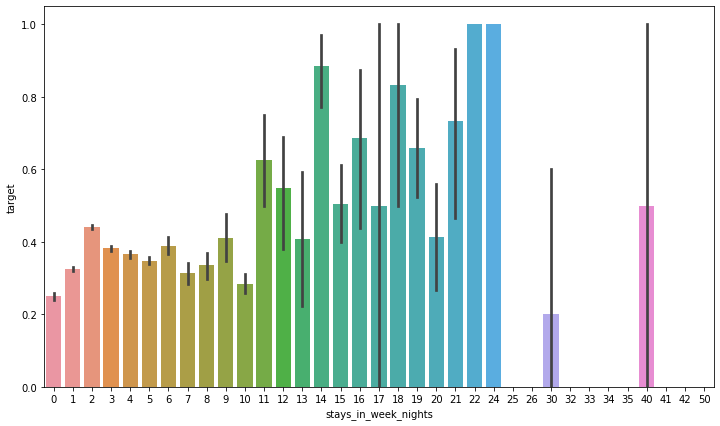

In [35]:
plt.figure(figsize=(12, 7))
ax = sb.barplot(x='stays_in_week_nights', y = 'target', data=data, estimator=np.mean)

In [36]:
data.groupby('stays_in_week_nights')['target'].count()

stays_in_week_nights
0      7645
1     30310
2     33684
3     22258
4      9563
5     11077
6      1499
7      1029
8       656
9       231
10     1036
11       56
12       42
13       27
14       35
15       85
16       16
17        4
18        6
19       44
20       41
21       15
22        7
24        3
25        6
26        1
30        5
32        1
33        1
34        1
35        1
40        2
41        1
42        1
50        1
Name: target, dtype: int64

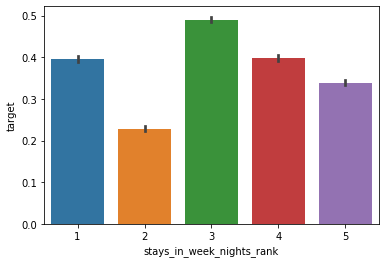

In [40]:
data['stays_in_week_nights_rank'] = pa.qcut(data['stays_in_week_nights'].rank(method='first').values,5,duplicates='drop').codes+1
ax = sb.barplot(x='stays_in_week_nights_rank', y='target', data=data, estimator=np.mean)

In [43]:
data.groupby('stays_in_week_nights_rank')['stays_in_week_nights'].max()

stays_in_week_nights_rank
1     1
2     2
3     2
4     4
5    50
Name: stays_in_week_nights, dtype: int64

In [45]:
data['stay_in_week_night_grp'] = np.where(data['stays_in_week_nights_rank'].isin(['1','2']),1,np.where(data['stays_in_week_nights_rank'].isin(['3','4']),2,3))

In [50]:
data.groupby('stay_in_week_night_grp')['target'].mean()

stay_in_week_night_grp
1    0.312170
2    0.444510
3    0.338722
Name: target, dtype: float64

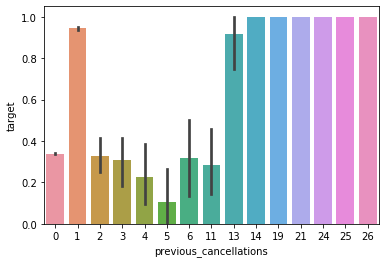

In [51]:
ax = sb.barplot(x='previous_cancellations', y='target', data=data, estimator=np.mean)

In [53]:
data['prev_cancel_idx'] = np.where(data['previous_cancellations'].isin(['0']),0,1)
data.groupby('prev_cancel_idx')['target'].count()

prev_cancel_idx
0    112906
1      6484
Name: target, dtype: int64

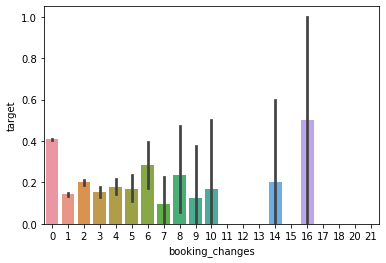

In [54]:
ax = sb.barplot(x='booking_changes', y='target', data=data, estimator=np.mean)

In [56]:
data.groupby('booking_changes')['target'].count()

booking_changes
0     101314
1      12701
2       3805
3        927
4        376
5        118
6         63
7         31
8         17
9          8
10         6
11         2
12         2
13         5
14         5
15         3
16         2
17         2
18         1
20         1
21         1
Name: target, dtype: int64

In [57]:
data['booking_changes'] = np.where(data['booking_changes'].isin(['0']),0,1)

In [58]:
data.groupby('booking_changes')['target'].count()

booking_changes
0    101314
1     18076
Name: target, dtype: int64

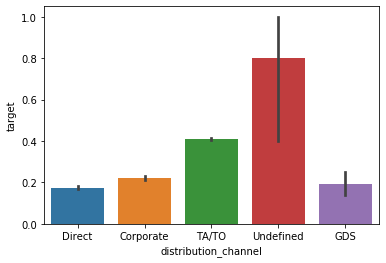

In [59]:
ax = sb.barplot(x='distribution_channel', y='target', data=data, estimator=np.mean)

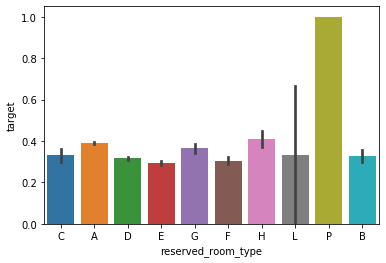

In [60]:
ax = sb.barplot(x='reserved_room_type', y='target', data=data, estimator=np.mean)

In [61]:
data.groupby('reserved_room_type')['target'].count()

reserved_room_type
A    85994
B     1118
C      932
D    19201
E     6535
F     2897
G     2094
H      601
L        6
P       12
Name: target, dtype: int64

##### Here we can observe that p type is giving highes mean but it is represented by very low number of events

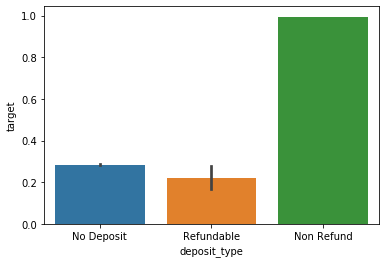

In [63]:
ax = sb.barplot(x='deposit_type', y='target', data=data, estimator=np.mean)

In [64]:
data.groupby('deposit_type')['target'].count()

deposit_type
No Deposit    104641
Non Refund     14587
Refundable       162
Name: target, dtype: int64

##### The term which represents the highest mean is not represented by number of counts

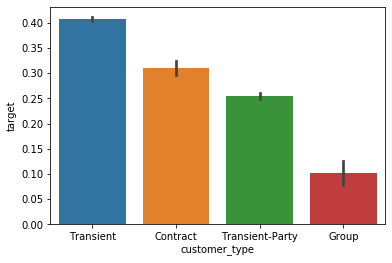

In [65]:
ax = sb.barplot(x='customer_type', y='target', data=data, estimator=np.mean)

In [66]:
data.groupby('customer_type')['target'].count()

customer_type
Contract            4076
Group                577
Transient          89613
Transient-Party    25124
Name: target, dtype: int64

##### here the target with gretest mean is represented by value with highest count

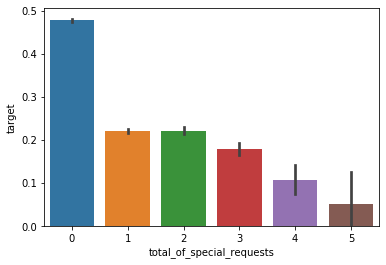

In [67]:
ax = sb.barplot(x='total_of_special_requests', y='target', data=data, estimator=np.mean)

In [68]:
data.groupby('total_of_special_requests')['target'].count()

total_of_special_requests
0    70318
1    33226
2    12969
3     2497
4      340
5       40
Name: target, dtype: int64

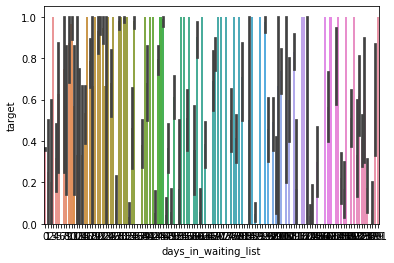

In [69]:
ax = sb.barplot(x='days_in_waiting_list', y='target', data=data, estimator=np.mean)

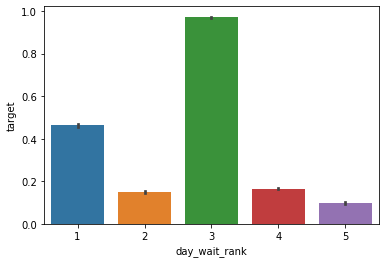

In [72]:
data['day_wait_rank'] = pa.cut(data['days_in_waiting_list'].rank(method='first').values,5,duplicates='drop').codes+1
ax = sb.barplot(x='day_wait_rank', y='target', data=data, estimator=np.mean)

In [74]:
data.groupby('day_wait_rank')['target'].mean()

day_wait_rank
1    0.463774
2    0.151143
3    0.971396
4    0.166220
5    0.099548
Name: target, dtype: float64

In [77]:
data['day_wait_ind']=np.where(data['day_wait_rank'].isin(['3']),1, 0)
data.groupby('day_wait_ind')['target'].count()

day_wait_ind
0    95512
1    23878
Name: target, dtype: int64

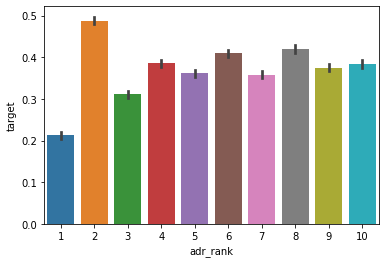

In [79]:
data['adr_rank'] = pa.qcut(data['adr'].rank(method='first').values,10,duplicates='drop').codes+1
ax = sb.barplot(x='adr_rank', y='target', data=data, estimator=np.mean)

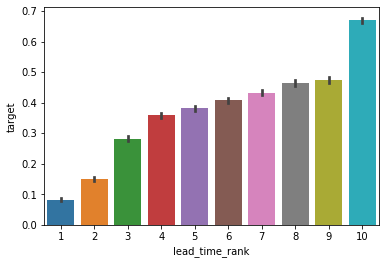

In [82]:
data['lead_time_rank'] = pa.qcut(data['lead_time'].rank(method='first').values,10,duplicates='drop').codes+1
ax = sb.barplot(x='lead_time_rank', y='target', data=data, estimator=np.mean)

In [84]:
data.groupby('lead_time_rank')['lead_time'].max()

lead_time_rank
1       3
2      11
3      26
4      45
5      69
6      99
7     138
8     184
9     265
10    737
Name: lead_time, dtype: int64

In [87]:
dep=['target']

col_num=['adr']

col_char=['day_wait_ind','total_of_special_requests','customer_type','reserved_room_type',
         'distribution_channel','market_segment',
         'prev_cancel_idx','stay_in_week_night_grp', 'lead_time_rank']

In [88]:
x_char_dum = pa.get_dummies(data[col_char], drop_first = True)

In [89]:
x_all = pa.concat([data[col_num], x_char_dum],axis=1, join='inner')

In [96]:
X_var= x_all
Y_var = data['target']

In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X_var, Y_var, test_size=0.3, random_state=0)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

dtree = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=7, min_samples_leaf=5)
dtree.fit(X_train, y_train)

rf_1000 = RandomForestClassifier(n_estimators=1000,
                  random_state=2,
                  criterion = 'gini',
                  max_features = 'auto', 
                  max_depth = 7)
rf_1000.fit(X_train, y_train)

C:\Users\skmal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

In [98]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.88


In [99]:
y_pred_tree=dtree.predict(X_test)
print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(dtree.score(X_test, y_test)))

Accuracy of Decision Tree classifier on test set: 0.88


In [100]:
y_pred_RF=rf_1000.predict(X_test)
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(rf_1000.score(X_test, y_test)))

Accuracy of Random Forest classifier on test set: 0.88


In [101]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[21900   471]
 [ 3997  9449]]


In [102]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91     22371
           1       0.97      0.70      0.81     13446

    accuracy                           0.88     35817
   macro avg       0.91      0.84      0.86     35817
weighted avg       0.89      0.88      0.87     35817



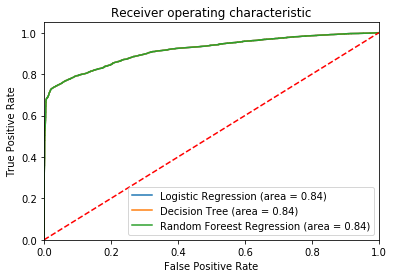

In [103]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
tree_roc_auc=roc_auc_score(y_test, dtree.predict(X_test))
RF_roc_auc=roc_auc_score(y_test, rf_1000.predict(X_test))

fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, dtree.predict_proba(X_test)[:,1])
fpr, tpr, thresholds = roc_curve(y_test, rf_1000.predict_proba(X_test)[:,1])

plt.figure()

plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % tree_roc_auc)
plt.plot(fpr, tpr, label='Random Foreest Regression (area = %0.2f)' % RF_roc_auc)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [110]:
y_pred_prob = logreg.predict_proba(X_var)[:, 1]
data['y_pred_P']=pa.DataFrame(y_pred_prob)
data['P_Rank']=pa.qcut(data['y_pred_P'].rank(method='first').values,10,duplicates='drop').codes+1
data.groupby('P_Rank')['y_pred_P'].min()

P_Rank
1     0.000821
2     0.050067
3     0.083261
4     0.110276
5     0.147660
6     0.195274
7     0.261660
8     0.392494
9     0.958402
10    0.987729
Name: y_pred_P, dtype: float64

In [112]:
y_pred_prob_dtree = dtree.predict_proba(X_var)[:, 1]
data['y_pred_P_dtree']=pa.DataFrame(y_pred_prob_dtree)
data['P_Rank_dtree']=pa.qcut(data['y_pred_P_dtree'].rank(method='first').values,10,duplicates='drop').codes+1
data.groupby('P_Rank_dtree')['target'].sum()

P_Rank_dtree
1       432
2       786
3      1234
4      1392
5      1775
6      3541
7      2381
8      8851
9     11908
10    11924
Name: target, dtype: int32

In [113]:
y_pred_prob_rf = rf_1000.predict_proba(X_var)[:, 1]
data['y_pred_P_rf']=pa.DataFrame(y_pred_prob_rf)
data['P_Rank_rf']=pa.qcut(data['y_pred_P_rf'].rank(method='first').values,10,duplicates='drop').codes+1
data.groupby('P_Rank_rf')['target'].sum()

P_Rank_rf
1       399
2       676
3      1067
4      1098
5      1853
6      2828
7      3263
8      9366
9     11752
10    11922
Name: target, dtype: int32

In [114]:
data.head()
data.to_csv('hotel_demand_prediction_scored_file.csv')